In [1]:
import os
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
base_dir = './data/cats_and_dogs'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(1, activation='sigmoid')
])



In [4]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-4),
              metrics=['acc'])

In [5]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(64, 64),  
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(64, 64),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 15s - loss: 0.6932 - acc: 0.5130 - val_loss: 0.6992 - val_acc: 0.5000 - 15s/epoch - 150ms/step
Epoch 2/100
100/100 - 5s - loss: 0.6870 - acc: 0.5415 - val_loss: 0.6793 - val_acc: 0.5150 - 5s/epoch - 48ms/step
Epoch 3/100
100/100 - 5s - loss: 0.6765 - acc: 0.5810 - val_loss: 0.6593 - val_acc: 0.5890 - 5s/epoch - 47ms/step
Epoch 4/100
100/100 - 5s - loss: 0.6571 - acc: 0.6095 - val_loss: 0.6514 - val_acc: 0.5970 - 5s/epoch - 46ms/step
Epoch 5/100
100/100 - 4s - loss: 0.6501 - acc: 0.6095 - val_loss: 0.6188 - val_acc: 0.6470 - 4s/epoch - 44ms/step
Epoch 6/100
100/100 - 4s - loss: 0.6335 - acc: 0.6355 - val_loss: 0.6073 - val_acc: 0.6540 - 4s/epoch - 45ms/step
Epoch 7/100
100/100 - 4s - loss: 0.6287 - acc: 0.6470 - val_loss: 0.5983 - val_acc: 0.6620 - 4s/epoch - 44ms/step
Epoch 8/100
100/100 - 4s - loss: 0.6169 - acc: 0.6580 - val_loss: 0.5960 - val_acc: 0.6700 - 4s/epoch - 44ms/step
E

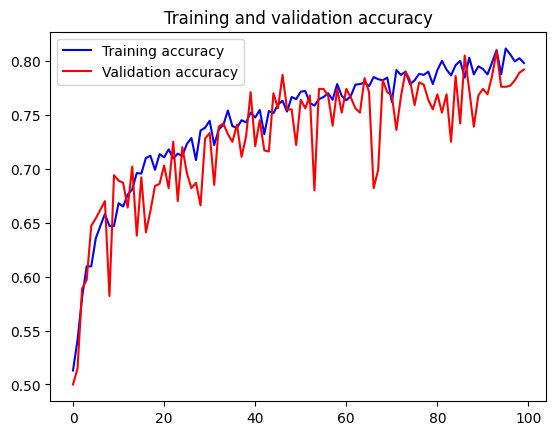

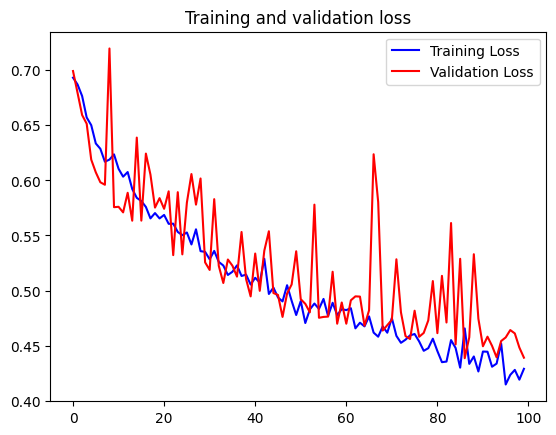

In [6]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()